In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Standard Imports

import numpy as np
import pandas as pd
import statsmodels
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import coint   
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime
from functools import cmp_to_key
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# predefined functions in this cell ,  no need to chagne them

def downloadStockData(tickers,start,end):
    """
        This function downloads the Close price of the stock and creates a dataframe from it
        Params:
            tickers : a list of ticker of various stocks
            start   : it is the start date of the data to be downloaded. It is a datetime in datetime format.
            end     : it is the end date of the data to be downloaded. It is a datetime in datetime format.

        Return:
            A dataframe with all the close for of each stock on each open market day
    """
    ticker_data = yf.download(tickers, start, end)['Adj Close']
    return ticker_data


In [ ]:
tickers = ['HD', 'DIS','MSFT', 'BA', 'MMM', 'PFE', 'NKE', 'JNJ', 'MCD', 'XOM', 'GS', 'JPM', 'AXP', 'V', 'IBM', 'UNH', 'PG', 'GE', 'KO', 'CSCO', 'CVX', 'CAT', 'MRK', 'WMT', 'VZ', 'RTX', 'TRV', 'AAPL', 'ADBE', 'EBAY', 'QCOM', 'HPQ', 'JNPR', 'AMD']
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2017,1,1)
data = downloadStockData(tickers,start,end)
data.head()

[*********************100%***********************]  34 of 34 completed


,AAPL,ADBE,AMD,AXP,BA,CAT,CSCO,CVX,DIS,EBAY,GE,GS,HD,HPQ,IBM,JNJ,JNPR,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,QCOM,RTX,TRV,UNH,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-03,10.091493,31.290001,8.47,36.961693,53.034523,69.793510,15.007279,59.754826,33.302654,11.623152,106.825790,146.697540,27.611784,14.501306,96.850700,45.991402,31.464514,32.375217,23.350754,56.308277,64.740776,23.910625,22.101496,18.942730,11.182627,46.387905,37.503578,38.450630,42.964626,31.468752,16.307364,22.049568,42.330910,48.346909
2011-01-04,10.144160,31.510000,8.77,37.430088,53.465824,69.467331,15.029259,59.533829,34.332912,11.538043,108.754265,146.722977,27.111317,14.803270,96.955757,46.379425,31.396927,32.843769,22.867418,54.624912,64.651260,24.116295,22.188385,18.476257,11.378699,46.516819,38.094017,38.513912,42.772198,31.756922,16.325872,22.491404,42.493851,48.573898
2011-01-05,10.227139,32.220001,8.91,38.516148,53.897129,70.067795,15.212362,59.429855,35.187057,11.643416,108.929565,147.502808,27.025303,14.996663,96.568329,46.350136,32.005272,33.245396,22.731363,54.882187,64.651260,24.255621,22.117292,18.597269,11.454597,46.409393,38.886234,38.567455,42.518196,31.858612,16.670420,22.800091,42.214531,48.444191
2011-01-06,10.218875,32.270000,8.69,38.251041,54.951427,69.341316,15.344199,58.942390,34.914082,11.517782,108.462074,145.985458,26.915812,15.227386,97.625633,46.276924,32.284100,33.081760,22.566669,54.551403,64.255913,24.587347,22.765007,18.430052,11.498873,46.330616,39.364559,38.528526,41.863949,32.519676,16.920168,22.216314,41.865402,48.755489
2011-01-07,10.292054,32.040001,8.83,37.934643,55.414684,69.482155,15.358847,59.267368,34.737968,11.225986,107.702377,144.696915,26.884541,15.298631,97.146217,45.830334,31.760241,32.457024,22.527285,54.669025,64.323051,24.779745,22.591230,18.379436,11.600075,46.194550,38.662033,38.494442,41.048069,32.587490,16.871603,22.032358,41.958500,49.021366


In [ ]:
def findCointegrationValue(data,p_value_threshold=0.05):
    """
        This function find out the pairs of stock with p value less than a constant
        Params:
            data               : the dataframe containning all the close for of each stock on each open market day
            p_value_threshold  : the threshold value for the p value of pairs of stocks. We consider a 2 stocks to be cointegrted only if the p value is less than this value

        Returns:
            p values of all the pairs , the list of all the pairs with p value less than the threshold 
    """
    n = data.shape[1]
    p_values_matrix = np.ones((n,n));
    keys = data.keys();
    pairs = []
    for i in range(n):
      for j in range(i+1,n):
        S1 = data[keys[i]]
        S2 = data[keys[j]]
        result = coint(S1,S2)
        pvalue = result[1]
        p_values_matrix[i,j]=pvalue
        if(pvalue < p_value_threshold):
          pairs.append(((i,j),pvalue))
        
    return p_values_matrix,pairs

In [ ]:
def compare(x,y):
  return x[1]-y[1]

def zscore(series):
    newSeries = series.copy()
    for i in range(len(newSeries)):
        x = (newSeries[i] - newSeries[:i+1].mean()) / np.std(newSeries[:i+1])
        series[i]= x
    return series


In [ ]:
def getBestKCointergratedStocks(data,k=10,p_value_threshold=0.05):
    """
        This functions find out the k pairs with the least p value and all of them should be less than the threshold  
        Params:
            data               : the dataframe containning all the close for of each stock on each open market day
            k                  : the number of pairs to be found out
            p_value_threshold  : the threshold value for the p value of pairs of stocks. We consider a 2 stocks to be cointegrted only if the p value is less than this value

        Returns:
            the p value for all the pairs of stocks , the list k pairs with the least p value and their p values . If k such pairs doesn't exists return how many of them occur 
    """
    p_values_matrix, pairs = findCointegrationValue(data)
    tem=sorted(pairs,key=cmp_to_key(compare))
    if len(tem) < k:
      return p_values_matrix,tem
    return p_values_matrix,tem[0:k]
   

In [ ]:
_, cointegrated_pair = getBestKCointergratedStocks(data,10)
keys  = data.keys()

In [ ]:
coint_cmp1 = keys[cointegrated_pair[0][0][0]]
coint_cmp2 = keys[cointegrated_pair[0][0][1]]
print(f"Pairs showing the highest cointegration are {coint_cmp1} and {coint_cmp2}.")

Pairs showing the highest cointegration are CSCO and TRV.


In [ ]:
print(cointegrated_pair)

[((6, 28), 0.002170132557706041), ((28, 30), 0.0053040360221782564), ((18, 31), 0.009209822914879607), ((12, 28), 0.014547482527817134), ((6, 12), 0.015296439234712075), ((6, 20), 0.015988472646918845), ((9, 24), 0.01649295430815651), ((6, 30), 0.01738554150629326), ((18, 28), 0.018217134563208722), ((18, 30), 0.018674682000284014)]


EBAY PFE


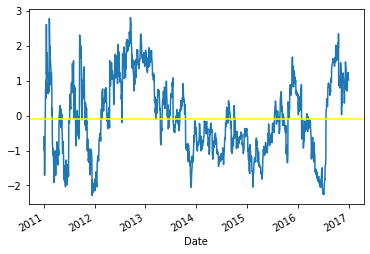

In [ ]:
S1= "EBAY"
S2= "PFE"
ratios = data[S1]/data[S2]
print(S1,S2)
zscore(ratios).plot()
plt.axhline(zscore(ratios).mean(),color="yellow")
plt.show()

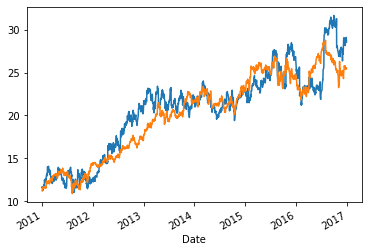

In [ ]:
data[S1].plot()
data[S2].plot()

MSFT ADBE


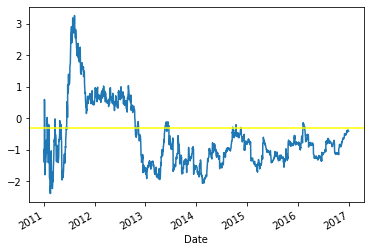

In [ ]:
S1= "MSFT"
S2= "ADBE"
ratios = data[S1]/data[S2]
print(S1,S2)
zscore(ratios).plot()
plt.axhline(zscore(ratios).mean(),color="yellow")
plt.show()

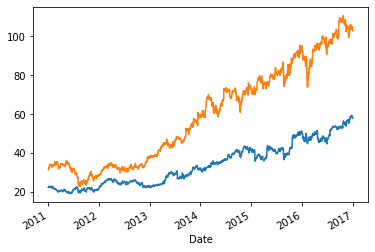

In [ ]:
data[S1].plot()
data[S2].plot()

In [ ]:
def trade1(S1, S2,window, MAX_SHORTING_AMOUNT = 10000, MAX_TRANSACTION_AT_A_TIME=5,error_bound1=0.1,error_bound2=0.05):
    """
        This functions performs the trading according to the following strategy
            For the cointegration approach , we will use the fit a line and then calculate the errors . If the error ratio(Y/X) between the time series at any point becomes such that it is greater 
            than the error_bound1 (the error is calculated by fitting a line to the ratios data over the last <window> days) we will short the stock Y and go for long X and square off whenever the ratio
            becomes less than error_bound2 .If the ratio becomes less than the -1*error_bound1 , we will follow the reverse strategy .
        Params: 
            data1                     : Time series data of stock 1
            data2                     : Time series data of stock 2
            window                    : The size of the datapoints for which we fit a line and calculate the eror 
            MAX_SHORTING_AMOUNT       : The maximum amount of money , for which the stocks can be shorted at a time
            MAX_TRANSACTION_AT_A_TIME : the number of times we can short a stock , in each shorting we do the shorting worth  MAX_SHORTING_AMOUNT/MAX_TRANSACTION_AT_A_TIME
            error_bound1              : A constant with usage stated above 
            error_bound2              : A constant with usage stated above
        Return:
            The profit which we can make by using this method
    """

    ratios = S1/S2
    money = 0
    stock1_count=0
    stock2_count=0
    num_of_trans=0
    for i in range(len(ratios)-window-1):
      Y = ratios[i:i+window]
      X = np.array(range(i+1,window+i+1))
      X = X.reshape(-1,1)
      model = LinearRegression().fit(X,Y)
      y_pred = model.predict([[ratios[i+window]]])
      error = ratios[i+window] - y_pred
      if error > error_bound1 and num_of_trans <= MAX_TRANSACTION_AT_A_TIME : 
        amount = MAX_SHORTING_AMOUNT/MAX_TRANSACTION_AT_A_TIME
        num_of_trans+=1
        stock1_count -= amount/S1[i+window]
        stock2_count += amount/S2[i+window]
      elif error < -error_bound1 and num_of_trans <= MAX_TRANSACTION_AT_A_TIME:
        amount = MAX_SHORTING_AMOUNT/MAX_TRANSACTION_AT_A_TIME
        num_of_trans+=1
        stock1_count += amount/S1[i+window]
        stock2_count -= amount/S2[i+window]

      elif error > -error_bound2 and error < error_bound2 :
        money += S1[i+window] * stock1_count + S2[i+window] * stock2_count
        stock1_count = 0
        stock2_count = 0
        num_of_trans = 0
    #Squaring off all transactions
    money += S1[len(ratios)-1] * stock1_count + S2[len(ratios)-1] * stock2_count

    return money
    


In [ ]:
def trade2(S1, S2, window1=5, window2=60,MAX_SHORTING_AMOUNT=10000, MAX_TRANSACTION_AT_A_TIME=5,c1=1,c2=0.75):
    """
        This functions performs the trading according to the following strategy
            For the cointegration approach, we will use the moving averages to calculate the transactions to be done.
            First of all we calculate the moving average on window size of window1 and window2 and the moving standard deviation for window size of window2 for the ratio(Y/X) of stocks.
            Also we assume window1<window2
            Now when moving_average_window1 > moving_average_window2 + c1 * standard_deviation_window2 , we then short the stock Y and go for long on stock X and we would square off when
            moving_average_window1 < moving_average_window2 - c2 * standard_deviation_window2.  
            Reverse strategy happens when moving_average_window1 < moving_average_window2 - c1 * standard_deviation_window2
        Params:
            data1                     : Time series data of stock 1
            data2                     : Time series data of stock 2
            window1                   : The size of the data points from which we calculate the moving averages. This will be the less number of days moving average
            window1                   : The size of the data points from which we calculate the moving averages. This will be the more number of days moving average
            MAX_SHORTING_AMOUNT       : The maximum amount of money , for which the stocks can be shorted at a time
            MAX_TRANSACTION_AT_A_TIME : the number of times we can short a stock , in each shorting we do the shorting worth  MAX_SHORTING_AMOUNT/MAX_TRANSACTION_AT_A_TIME
    """
     # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,center=False).mean()
    ma2 = ratios.rolling(window=window2,center=False).mean()
   
    std2 = ratios.rolling(window=window2,
                        center=False).std()
    
    money=0
    stock1_count = 0
    stock2_count = 0
    num_of_trans = 0
    for i in range(window2-1,len(ratios)):
        if ma1[i] > (ma2[i]+c1*std2[i]) and num_of_trans <= MAX_TRANSACTION_AT_A_TIME :
            num_of_trans +=1
            amount = MAX_SHORTING_AMOUNT/MAX_TRANSACTION_AT_A_TIME
            stock1_count -= amount/S1[i] 
            stock2_count += amount/S2[i]
        elif ma1[i] < (ma2[i] - c1*std2[i]) and num_of_trans <= MAX_TRANSACTION_AT_A_TIME :  
            num_of_trans +=1
            amount = MAX_SHORTING_AMOUNT/MAX_TRANSACTION_AT_A_TIME
            stock1_count += amount/S1[i] 
            stock2_count -= amount/S2[i]
        elif ma1[i] <= ma2[i]+c2*std2[i] and ma1[i] >= ma2[i]-c2*std2[i]:
            money += S1[i] * stock1_count + S2[i] * stock2_count
            stock1_count = 0
            stock2_count = 0
            num_of_trans = 0

    #Squaring off all transactions
    money += S1[len(ratios)-1] * stock1_count + S2[len(ratios)-1] * stock2_count

    return money


In [ ]:
cointegraed_tickers = ['CSCO','TRV']
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2019,1,1)
recent_cointegrated_data = downloadStockData(cointegraed_tickers,start,end)

[*********************100%***********************]  2 of 2 completed


In [ ]:
print("From strategy 1, Net gain: ",trade1(recent_cointegrated_data['CSCO'],recent_cointegrated_data['TRV'],10))

From strategy 1, Net gain:  1315.1279754638952


In [ ]:
print("From strategy 2, Net gain: ",trade2(recent_cointegrated_data['CSCO'],recent_cointegrated_data['TRV']))

From strategy 2, Net gain:  2461.72425965391
